In [1]:
import hangul_font
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import os
import time
import math
import webbrowser
import numpy as np
import re
import sys
import csv

df = pd.read_csv('data_visual.txt2023-1-7-8해시태그 by 스타일.csv',encoding='cp949')
df.drop('Unnamed: 0',axis='columns',inplace =True)
df.rename(columns = {'cordi':'코디','0':'날짜','1':'조회수','2':'댓글'},inplace=True)
df.drop(columns=['댓글'], inplace=True)
df

filter_daendi = (df['코디'] == '댄디')
filter_casual =(df['코디'] == '캐주얼')
filter_street = (df['코디'] == '스트릿')
filter_formal = (df['코디'] == '포멀')
filter_sports = (df['코디'] == '스포츠')
filter_americancasual = (df['코디'] == '아메리칸 캐주얼')


df_sports = df[filter_sports]
df_sports_hashtag = pd.DataFrame(df_sports)
df_sports_hashtag.drop(columns = ['날짜','조회수'],inplace=True)
df_sports_hashtag


n = time.localtime()
s = f'{n.tm_year}-{n.tm_mon}-{n.tm_mday}-{n.tm_sec}'
f_dir = "c:\\temp\\"+s+'.txt'
fc_name = f_dir+'sports'+'.csv'

df_sports_hashtag.to_csv(fc_name,index ='코디',encoding='cp949')

In [2]:
import csv
csv_list = []
with open('2023-1-8-38.txtsports.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    csv_list = list(reader)
    del csv_list[0]


list2 = np.concatenate(csv_list).tolist()
sports_hashlist = [item for item in list2 if item != ''  ]

from collections import Counter


#1~100위 스타일 분포
sports_cate=np.array(list(set(sports_hashlist)))
array_style = np.array(sports_hashlist)
sportshash_dict=Counter(array_style)
list_key=[]
list_value = []
for key,value in sportshash_dict.items():
    list_key.append(key)
    list_value.append(value)

n = time.localtime()
s = f'{n.tm_year}-{n.tm_mon}-{n.tm_mday}-{n.tm_sec}'
f_dir = "c:\\temp\\" +s+".txt"
fc_name = f_dir+s+' sportshash.csv'

df_sportshash= pd.DataFrame(list_value,index=list_key,columns=['개수'])
ref_sports_df=df_sportshash['개수'].sort_values(ascending =False)
ref_sports_df.to_csv(fc_name,encoding='cp949') 

In [9]:
df=pd.read_csv('2023-1-8-20.txt2023-1-8-20 sportshash.csv',encoding='cp949',index_col=0)
sports_fit_df=df.loc[['와이드핏','오버핏','드로우핏','벌룬핏','식스핏']]
sports_products_df = df.loc[['반소매 티셔츠','셔츠블라우스','트레이닝조거 팬츠','맨투맨스웨트셔츠','안경 소품']]
sports_fit_df.sort_values('개수',ascending=False,inplace=True)
sports_products_df.sort_values('개수',ascending=True,inplace=True)


Text(0.5, 0, '해시태그 개수')

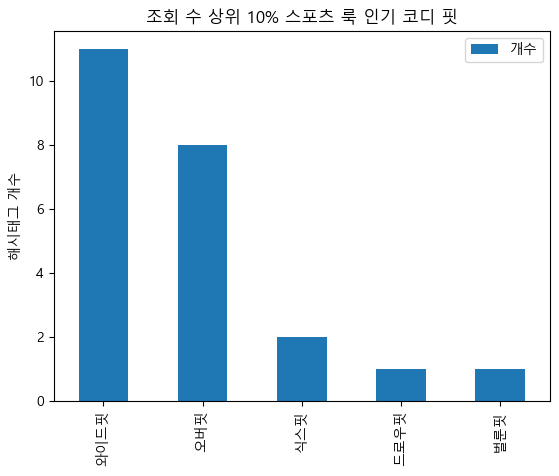

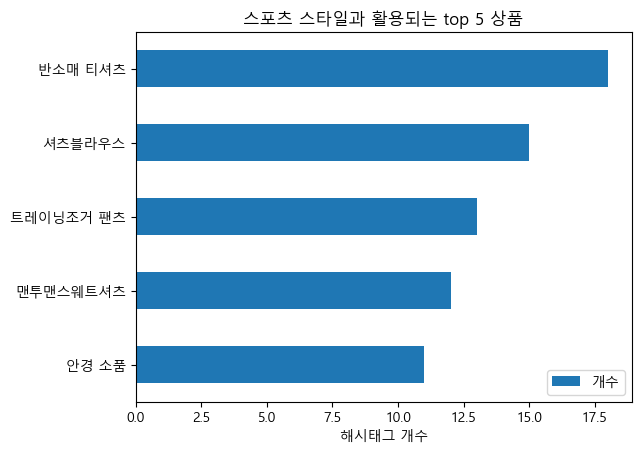

In [10]:
sports_fit_df.plot(kind='bar')
plt.title('조회 수 상위 10% 스포츠 룩 인기 코디 핏')
plt.ylabel('해시태그 개수')

sports_products_df.plot(kind = 'barh')
plt.title('스포츠 스타일과 활용되는 top 5 상품')
plt.xlabel('해시태그 개수')